# Import de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Carregando e visualizando os dados

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/gsmteixeira/EAFExp2023/main/data/Pima-Diabetes.csv",
                   names=['No gravidez',
                          'Glicose (mg/dL)',
                          'Pressão Sanguínea (mmHg)',
                          'Espessura da pele (micro m)',
                          'Insulina',
                          'BMI',
                          'DPF',
                          'Idade',
                          'Resultado'])

Data

,No gravidez,Glicose (mg/dL),Pressão Sanguínea (mmHg),Espessura da pele (micro m),Insulina,BMI,DPF,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0


# Separando treino teste e validação

In [ ]:
# inicializa um array de indices, correspondente ao indices dos dados aleatorizados 
all_index = range(len(Data))
random_index = np.random.choice(all_index, len(all_index), replace=False)

# escolhendo ~80% dos dados para treino e ~20% pra teste
train_len = int(0.8*len(Data))

train_index = random_index[:train_len]
test_index = random_index[train_len:]


# dos 80% dos dados de treino, 1/8 (10% do total) será usado para validação durante o treinamento
val_size = int(1/8*len(train_index))

val_index = train_index[:val_size]
train_index = train_index[val_size:]

# atribuindo os indices correspondentes a cada conjunto
data_train = Data.iloc[train_index]
data_test = Data.iloc[test_index]
data_val = Data.iloc[val_index]

print(f"Data size => {len(Data)}")
print(f"Train size => {len(data_train)}")
print(f"Test size => {len(data_test)}")
print(f"Val size => {len(data_val)}")


Data size => 758
Train size => 531
Test size => 152
Val size => 75


In [ ]:
# separando dados observados e o gabarito (sendo o gabarito a ultma tabela, "Resultados")

x_train = np.array(data_train)[:, :-1]
x_test = np.array(data_test)[:, :-1]
x_val = np.array(data_val)[:, :-1]

y_train = np.array(data_train)[:, -1]
y_test = np.array(data_test)[:, -1]
y_val = np.array(data_val)[:, -1]


# Normalização

In [ ]:
#normalização dividindo cada coluna pelo valor máximo daquela feature no conjunto de treino

norm = np.max(x_train, axis=0)
# (x_train/norm).shape

norm_x_train = x_train/norm
norm_x_test = x_test/norm
norm_x_val = x_val/norm 

# Inicializando modelo

In [ ]:
import tensorflow.keras as tfk

network = tfk.models.Sequential()

network.add(tfk.layers.Dense(128, activation = 'linear', input_shape = x_train.shape[1:]))
network.add(tfk.layers.Dropout(0.7))

network.add(tfk.layers.Dense(64, activation = 'linear'))
network.add(tfk.layers.Dropout(0.6))

network.add(tfk.layers.Dense(32, activation = 'tanh'))
network.add(tfk.layers.Dropout(0.6))

network.add(tfk.layers.Dense(1, activation = 'sigmoid'))
network.compile(optimizer = 'Nadam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

# model = tfk.models.Model(network)

# Treinamento 

In [ ]:
EPOCHS = 60
BATCH_SIZE = 32

history = network.fit(x=norm_x_train, y=y_train,
                        validation_data=(norm_x_val, y_val),
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE)

Epoch 1/60
17/17 [==============================] - 2s 17ms/step - loss: 0.7777 - accuracy: 0.5461 - val_loss: 0.6805 - val_accuracy: 0.6133
Epoch 2/60
17/17 [==============================] - 0s 6ms/step - loss: 0.7595 - accuracy: 0.5386 - val_loss: 0.6840 - val_accuracy: 0.6133
Epoch 3/60
17/17 [==============================] - 0s 6ms/step - loss: 0.7402 - accuracy: 0.5895 - val_loss: 0.6762 - val_accuracy: 0.6133
Epoch 4/60
17/17 [==============================] - 0s 7ms/step - loss: 0.7146 - accuracy: 0.5838 - val_loss: 0.6719 - val_accuracy: 0.6133
Epoch 5/60
17/17 [==============================] - 0s 5ms/step - loss: 0.7345 - accuracy: 0.5913 - val_loss: 0.6614 - val_accuracy: 0.6133
Epoch 6/60
17/17 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.6083 - val_loss: 0.6609 - val_accuracy: 0.6133
Epoch 7/60
17/17 [==============================] - 0s 6ms/step - loss: 0.6831 - accuracy: 0.6384 - val_loss: 0.6496 - val_accuracy: 0.6133
Epoch 8/60
17/17 [=

# Resultados

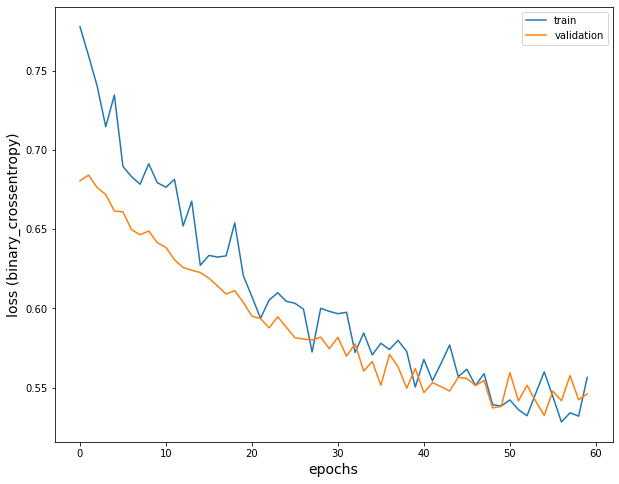

In [ ]:
# curva de treino
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss (binary_crossentropy)', fontsize=14)
plt.legend()

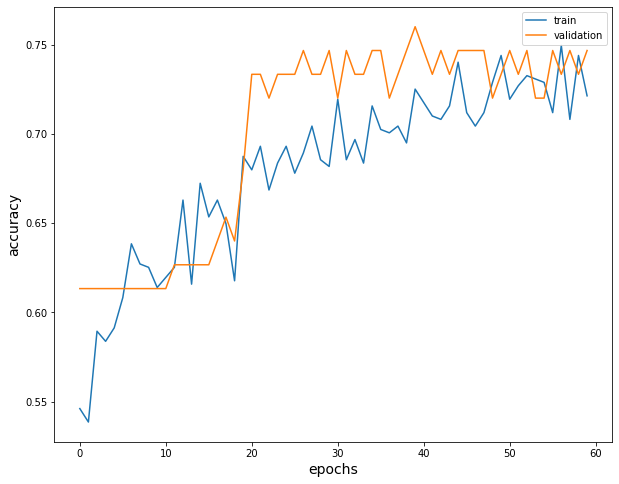

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.xlabel('epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend()

# Teste 

5/5 [==============================] - 0s 4ms/step


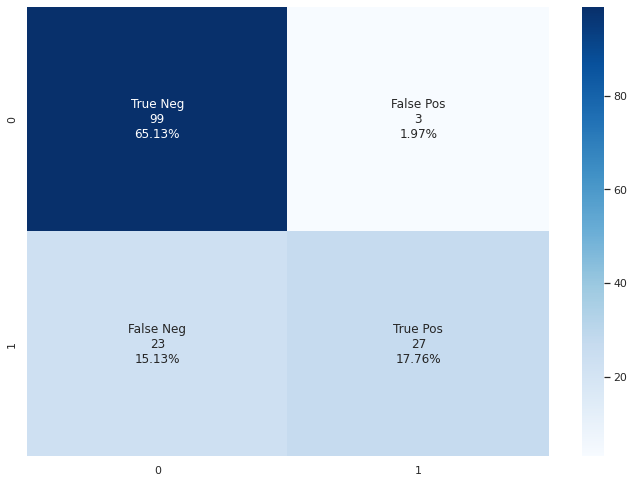

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = (network.predict(norm_x_test) > .5).astype('int')

cf_matrix = confusion_matrix(y_test, y_pred)

sns.set(rc={'figure.figsize':(11.7,8.27)})

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Teste uma nova forma de normalização dos dados e compare os resultados

Sugestão: Standard Deviation Normalization

$$
x_{norm} = \frac{x - \bar{x}}{\sigma}
$$